In [ ]:
## Background
The prices of houses in Nigeria is known for its flunctuation overtime. This can be attributed to the loss in the value of the naira and some other factors. However, the aim of this analysis is to know how the prices of houses vary in different locations with respect to number of rooms and other inherent factors. This analysis will also help us establish how the prices of houses are affected by their inherent characteristics such as bedrooms and parking space.

## Preparation Of Data and Required Packages
The dataset to be used was extracted from data.world website. We will be loading the tidyverse package which is required for this analysis and also load the data using the read.csv function.

In [1]:
library(tidyverse)
nigeria_houses <- read.csv('/kaggle/input/nigeria-houses-data/nigeria_houses_data.csv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Let's have a glimpse of the data.

In [2]:
glimpse(nigeria_houses)
head(nigeria_houses)

Rows: 24,326
Columns: 8
$ bedrooms      <dbl> 6, 4, 4, 4, 4, 5, 4, 2, 1, 4, 3, 6, 4, 4, 6, 3, 4, 3, 4,…
$ bathrooms     <dbl> 5, 5, 5, 4, 4, 5, 5, 2, 1, 4, 4, 6, 5, 4, 6, 4, 4, 3, 5,…
$ toilets       <dbl> 5, 5, 5, 5, 5, 6, 5, 3, 1, 5, 5, 6, 6, 5, 7, 4, 5, 4, 5,…
$ parking_space <dbl> 4, 4, 4, 6, 2, 1, 4, 6, 1, 5, 4, 4, 3, 4, 4, 3, 4, 4, 4,…
$ title         <chr> "Detached Duplex", "Terraced Duplexes", "Detached Duplex…
$ town          <chr> "Mabushi", "Katampe", "Lekki", "Ajah", "Lekki", "Lekki",…
$ state         <chr> "Abuja", "Abuja", "Lagos", "Lagos", "Lagos", "Lagos", "L…
$ price         <dbl> 4.5e+08, 8.0e+08, 1.2e+08, 4.0e+07, 7.5e+07, 4.5e+08, 6.…


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,6,5,5,4,Detached Duplex,Mabushi,Abuja,4.5e+08
2,4,5,5,4,Terraced Duplexes,Katampe,Abuja,8.0e+08
3,4,5,5,4,Detached Duplex,Lekki,Lagos,1.2e+08
4,4,4,5,6,Detached Duplex,Ajah,Lagos,4.0e+07
5,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,7.5e+07
6,5,5,6,1,Detached Duplex,Lekki,Lagos,4.5e+08


The data is clean and processed so that means it can be relied on for our analysis.

## Analysis

### Average price for 3 bedroom flats across different states in Nigeria

In [3]:
nigeria_houses %>%
  drop_na() %>%
  filter(bedrooms == 3) %>%
  group_by(state) %>%
  summarize(avg_price = mean(price)) %>% 
  arrange(-avg_price)

state,avg_price
<chr>,<dbl>
Lagos,100907396
Abia,92500000
Abuja,79076492
Delta,71681818
Anambara,67510811
Rivers,63508929
Imo,50768293
Enugu,42052632
Kogi,40000000



### Towns with highest prices for 3 bedroom flats in Lagos

In [4]:
nigeria_houses %>%
  drop_na() %>%
  filter(bedrooms == 3 & state == "Lagos") %>%
  group_by(town) %>%
  summarize(avg_price = mean(price)) %>% 
  arrange(-avg_price)

town,avg_price
<chr>,<dbl>
Ikoyi,470073750
Apapa,335000000
Victoria Island (VI),222848125
Maryland,190625000
Shomolu,175000000
Ajah,136514857
Ilupeju,136042857
Lagos Island,132500000
Ijesha,120000000



### Towns with the cheapest price for 3 bedroom flats in Lagos

In [5]:
nigeria_houses %>%
  drop_na() %>%
  filter(bedrooms == 3 & state == "Lagos") %>%
  group_by(town) %>%
  summarize(avg_price = mean(price)) %>% 
  arrange(avg_price)

town,avg_price
<chr>,<dbl>
Imota,6250000
Ijede,12000000
Ayobo,12900000
Agbara-Igbesa,15000000
Badagry,15000000
Epe,15000000
Ibeju,15000000
Ipaja,18375000
Agege,20157500



### lowest to highest prices for 3 bedroom flats in Abuja

In [6]:
nigeria_houses %>%
  drop_na() %>%
  filter(bedrooms == 3 & state == "Abuja") %>%
  group_by(town) %>%
  summarize(avg_price = mean(price)) %>% 
  arrange(avg_price)

town,avg_price
<chr>,<dbl>
Gwagwalada,10500000
Kuje,13650000
Nyanya,14500000
Dei-Dei,17000000
Orozo,17000000
Kyami,18100000
Karshi,21250000
Bwari,24000000
Dakibiyu,27500000



### highest to lowest prices for 3 bedroom flats in Abuja

In [7]:
nigeria_houses %>%
  drop_na() %>%
  filter(bedrooms == 3 & state == "Abuja") %>%
  group_by(town) %>%
  summarize(avg_price = mean(price)) %>% 
  arrange(-avg_price)

town,avg_price
<chr>,<dbl>
Maitama District,619136475
Katampe,441437500
Kado,420000000
Guzape District,418000000
Durumi,395000000
Garki,283571429
Utako,191857143
Asokoro District,179571429
Jabi,151500000



### Prices of 3 bedroom flats according to types or title

In [8]:
nigeria_houses %>%
  drop_na() %>%
  filter(bedrooms == 3) %>%
  group_by(title) %>%
  summarize(avg_price = mean(price)) %>% 
  arrange(-avg_price)

title,avg_price
<chr>,<dbl>
Semi Detached Duplex,334855769
Block of Flats,135848434
Detached Duplex,86381780
Terraced Duplexes,60999557
Detached Bungalow,41099525
Terraced Bungalow,30242299
Semi Detached Bungalow,24329454



## Visualization
We will be using visualizations to show how the price of houses is affected by the different inherent characteristics such as bedroom and parking space.

### Relationship Between Number Of Toilet and Average Price Of Houses

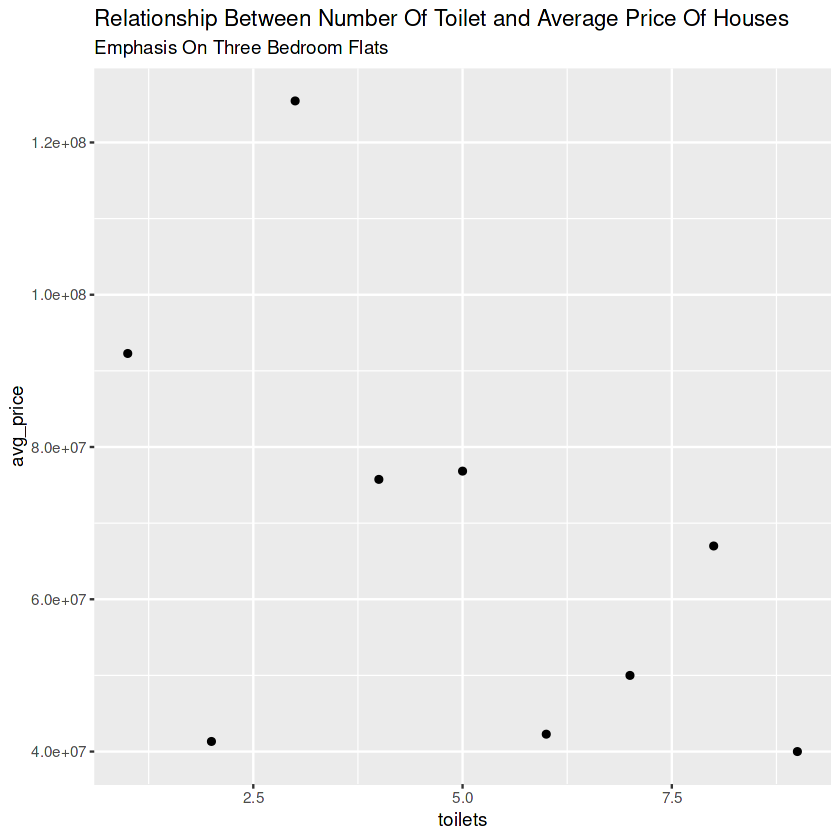

In [9]:
nigeria_houses %>% 
  drop_na() %>% 
  filter(bedrooms == 3) %>% 
  group_by(toilets) %>% 
  summarize(avg_price = mean(price)) %>% 
  ggplot(mapping = aes(x = toilets, y = avg_price))+
  geom_point()+
  labs(title = 'Relationship Between Number Of Toilet and Average Price Of Houses', subtitle = 'Emphasis On Three Bedroom Flats')


There isn't much correlation going on there.

### Relationship Between Number Of Bathrooms and Average Price Of Houses

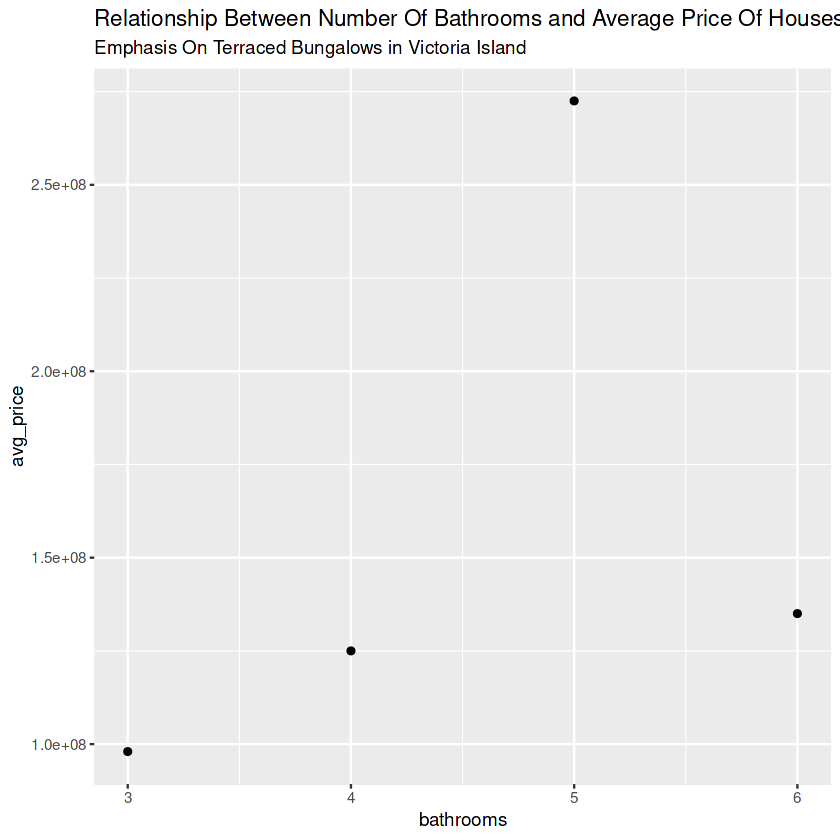

In [10]:
nigeria_houses %>% 
  drop_na() %>% 
  filter(state == 'Lagos' & town == 'Victoria Island (VI)' & title == 'Terraced Bungalow') %>% 
  group_by(bathrooms) %>% 
  summarize(avg_price = mean(price)) %>% 
  ggplot(mapping = aes(x = bathrooms, y = avg_price))+
  geom_point()+
  labs(title = 'Relationship Between Number Of Bathrooms and Average Price Of Houses', subtitle = 'Emphasis On Terraced Bungalows in Victoria Island')


The number of bathrooms also seems not to be a determining factor for the prices of houses.

### Relationship Between Number Of Parking Space and Average Price Of Houses

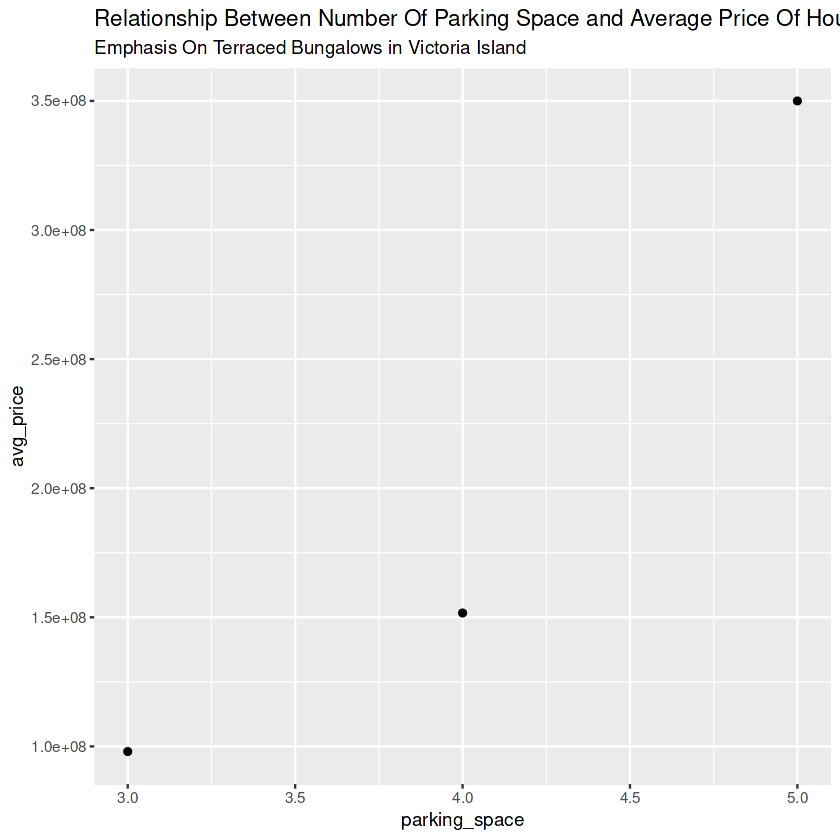

In [11]:
nigeria_houses %>% 
  drop_na() %>% 
  filter(state == 'Lagos' & town == 'Victoria Island (VI)' & title == 'Terraced Bungalow') %>% 
  group_by(parking_space) %>% 
  summarize(avg_price = mean(price)) %>% 
  ggplot(mapping = aes(x = parking_space, y = avg_price))+
  geom_point()+
  labs(title = 'Relationship Between Number Of Parking Space and Average Price Of Houses', subtitle = 'Emphasis On Terraced Bungalows in Victoria Island')


This shows some direct correlation.

### Relationship Between Number Of Bedrooms and Average Price Of Houses

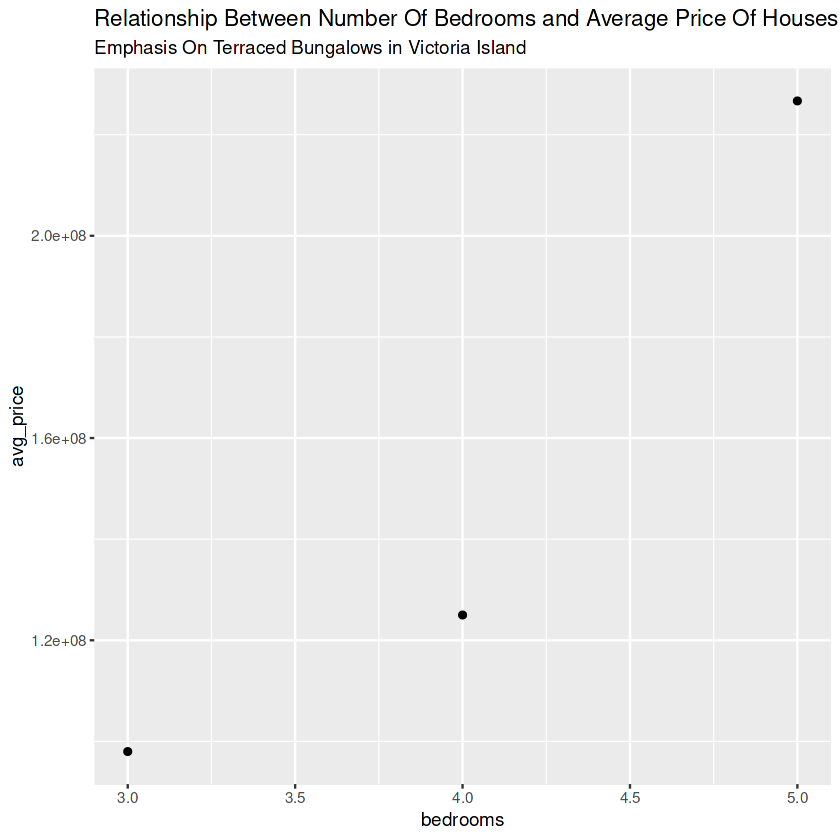

In [12]:
nigeria_houses %>% 
  drop_na() %>% 
  filter(state == 'Lagos' & town == 'Victoria Island (VI)' & title == 'Terraced Bungalow') %>% 
  group_by(bedrooms) %>% 
  summarize(avg_price = mean(price)) %>% 
  ggplot(mapping = aes(x = bedrooms, y = avg_price))+
  geom_point()+
  labs(title = 'Relationship Between Number Of Bedrooms and Average Price Of Houses', subtitle = 'Emphasis On Terraced Bungalows in Victoria Island')


### Conclusion
* The prices of houses are not really determined by the number of bathrooms or toilets but by the number of bedrooms and parking space available.
* The five most expensive states to buy a house in Nigeria are Lagos, Abia, Abuja, Delta and Anambra.
* The most expensive place to buy a house in Lagos is Ikoyi while the cheapest place is Imota.
* Gwagwalada is the cheapest place to buy a house in Abuja and the most expensive houses are in Maitama.
* The most expensive houses in Nigeria are semi detached duplex while the cheapest are semi detached bungalows.